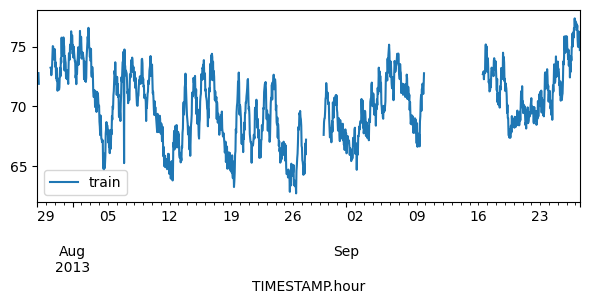

In [1]:
from insight_analyzer import AnomalyAnalyzer


env = AnomalyAnalyzer(insight_id="657f0cc8-fa05-46bb-9808-8cf4f065ce3d")

env.show_data()

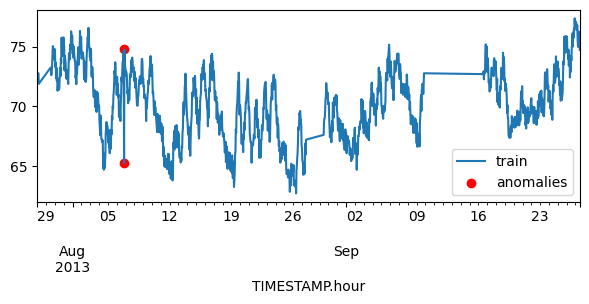

In [2]:
env.anomalies()